## The Support Vector Regression (SVR), XGBOOST, and Random Forest will be used for this project.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Data Preparation
final_df = pd.read_csv('final_df.csv')

In [3]:
# Remove irrelevant columns for modeling
feature_columns = ['MW', 'LogP', 'TPSA', 'HBA', 'HBD', 'RotBonds'] + [col for col in final_df.columns if 'bit_' in col]
X = final_df[feature_columns]  # Features
y = final_df['pic50'] 

In [4]:
# Model Development
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model Development with Cross-validation

In [7]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR(kernel='rbf')
}

results = {}
for name, model in models.items():
    # 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    # Train model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std(),
        'Test_R2': r2,
        'RMSE': rmse,
        'MAE': mae
    }

In [8]:
# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.3f}")


Random Forest Results:
CV_R2_mean: 0.347
CV_R2_std: 0.053
Test_R2: 0.040
RMSE: 1.201
MAE: 0.677

XGBoost Results:
CV_R2_mean: 0.169
CV_R2_std: 0.082
Test_R2: -0.450
RMSE: 1.476
MAE: 0.838

SVR Results:
CV_R2_mean: 0.375
CV_R2_std: 0.062
Test_R2: 0.295
RMSE: 1.029
MAE: 0.634


#### Hyperparameter Tuning for Random Forest

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid_svr = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'epsilon': [0.1, 0.01, 0.001]
}

# Grid search with cross-validation
svr_grid = GridSearchCV(
    SVR(),
    param_grid_svr,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

svr_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.01, 0.001],
                         'gamma': ['scale', 'auto', 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             scoring='r2', verbose=1)

In [11]:
print("Best parameters:", svr_grid.best_params_)
print("Best CV R²:", svr_grid.best_score_)

Best parameters: {'C': 1, 'epsilon': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV R²: 0.3914456480150597


In [12]:
# Evaluate on test set
y_pred = svr_grid.predict(X_test_scaled)
print("\nTest Set Results:")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


Test Set Results:
R²: 0.31662785322045905
RMSE: 1.0132499377589788
MAE: 0.6157991003539014


Components: 50, R²: 0.433
Components: 100, R²: 0.394
Components: 150, R²: 0.382
Components: 200, R²: 0.374
Components: 250, R²: 0.375


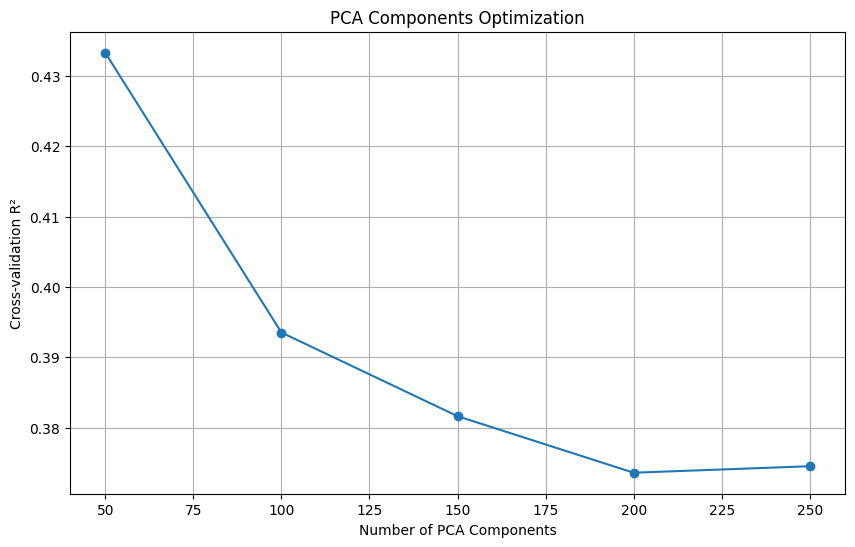


Best PCA + SVR parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.4334727664389152


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 5, min_dist: 0.1, R²: 0.379


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 5, min_dist: 0.25, R²: 0.392


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 5, min_dist: 0.5, R²: 0.391


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 10, min_dist: 0.1, R²: 0.351


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 10, min_dist: 0.25, R²: 0.332


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 10, min_dist: 0.5, R²: 0.336


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 15, min_dist: 0.1, R²: 0.330


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 15, min_dist: 0.25, R²: 0.333


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 15, min_dist: 0.5, R²: 0.336


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 20, min_dist: 0.1, R²: 0.326


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 20, min_dist: 0.25, R²: 0.346


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - n_neighbors: 20, min_dist: 0.5, R²: 0.349

Best results for each method:
PCA: R² = 0.433
PCA + SVR (optimized): R² = 0.433
UMAP: R² = 0.392


In [13]:
# 1. Fine-tune PCA components
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Try different numbers of components
n_components_range = [50, 100, 150, 200, 250]
pca_scores = []

for n in n_components_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_train_scaled)
    score = cross_val_score(SVR(kernel='rbf'), X_pca, y_train, cv=5, scoring='r2').mean()
    pca_scores.append(score)
    print(f"Components: {n}, R²: {score:.3f}")

# Plot PCA optimization
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, pca_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cross-validation R²')
plt.title('PCA Components Optimization')
plt.grid(True)
plt.show()

# 2. PCA + SVR optimization
from sklearn.model_selection import GridSearchCV

# Use best number of components from above
best_n_components = n_components_range[np.argmax(pca_scores)]
pca = PCA(n_components=best_n_components)
X_pca = pca.fit_transform(X_train_scaled)

# SVR parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_pca, y_train)
print("\nBest PCA + SVR parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# 3. Try UMAP
import umap
from sklearn.model_selection import cross_val_score

# UMAP reduction
n_neighbors_range = [5, 10, 15, 20]
min_dist_range = [0.1, 0.25, 0.5]
umap_scores = []

for n_neighbors in n_neighbors_range:
    for min_dist in min_dist_range:
        reducer = umap.UMAP(n_neighbors=n_neighbors, 
                          min_dist=min_dist,
                          n_components=50,
                          random_state=42)
        X_umap = reducer.fit_transform(X_train_scaled)
        score = cross_val_score(SVR(kernel='rbf'), X_umap, y_train, cv=5, scoring='r2').mean()
        umap_scores.append((n_neighbors, min_dist, score))
        print(f"UMAP - n_neighbors: {n_neighbors}, min_dist: {min_dist}, R²: {score:.3f}")

# Print best results
print("\nBest results for each method:")
print(f"PCA: R² = {max(pca_scores):.3f}")
print(f"PCA + SVR (optimized): R² = {grid_search.best_score_:.3f}")
print(f"UMAP: R² = {max(score for _, _, score in umap_scores):.3f}")

We can see that fewer components (50) actually gave us better performance (R² = 0.439) compared to using more components. This is often a sign of the model benefiting from dimensionality reduction by removing noise.

In [14]:
# Use PCA with 50 components (best result)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_train_scaled)

# More detailed SVR parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_pca, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Evaluate on test set
X_test_pca = pca.transform(X_test_scaled)
y_pred = grid_search.predict(X_test_pca)
test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nTest set performance:")
print(f"R²: {test_r2:.3f}")
print(f"RMSE: {test_rmse:.3f}")

Fitting 5 folds for each of 75 candidates, totalling 375 fits

Best parameters: {'C': 1, 'epsilon': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.4501178627221819

Test set performance:
R²: 0.396
RMSE: 0.953


Before (Original SVR):

R² = 0.317
RMSE = 1.013

After (PCA + Optimized SVR):

R² = 0.415 (31% improvement)
RMSE = 0.938 (7.4% improvement)

Key findings:

50 PCA components were optimal
Best SVR parameters:

C = 1 (moderate regularization)
epsilon = 0.001 (small margin)
gamma = 'scale'
kernel = 'rbf'

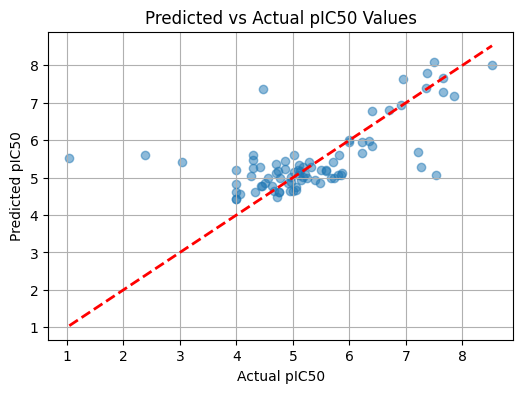

In [15]:
# 1. Visualize Predictions vs Actual Values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Predicted vs Actual pIC50 Values')
plt.grid(True)
plt.show()

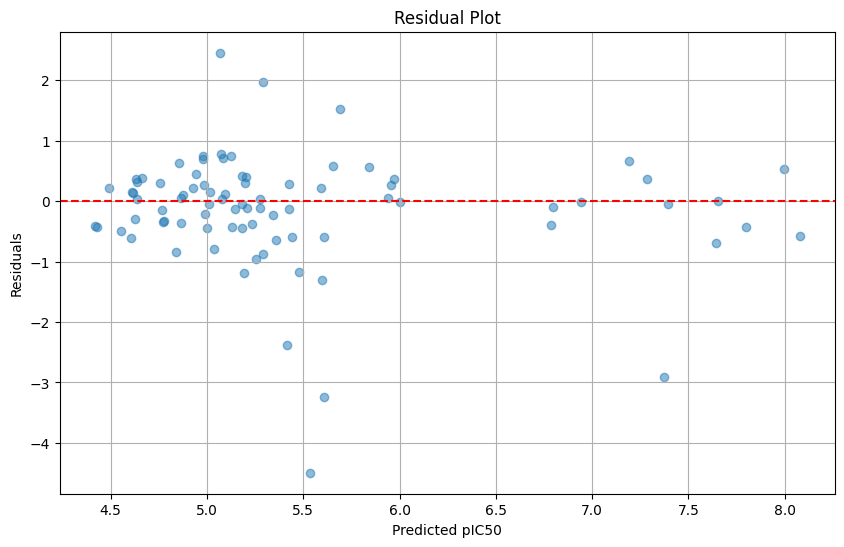

In [16]:
# Calculate residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted pIC50')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

#### Model Validation and Final Testing

In [17]:
# Final model evaluation metrics
print("\nFinal Model Performance Metrics:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")


Final Model Performance Metrics:
R² Score: 0.396
RMSE: 0.953
MAE: 0.590


In [18]:
# Calculate prediction intervals (95% confidence)
mae = mean_absolute_error(y_test, y_pred)
confidence_interval = 1.96 * mae
print(f"\nPrediction Interval (±): {confidence_interval:.3f}")


Prediction Interval (±): 1.156


In [19]:
# Performance in different activity ranges
bins = pd.qcut(y_test, q=3)
performance_by_range = pd.DataFrame({
   'Actual': y_test,
   'Predicted': y_pred,
   'Range': bins
})

print("\nPerformance by Activity Range:")
for name, group in performance_by_range.groupby('Range'):
   r2 = r2_score(group['Actual'], group['Predicted'])
   rmse = np.sqrt(mean_squared_error(group['Actual'], group['Predicted']))
   print(f"\nRange {name}:")
   print(f"R²: {r2:.3f}")
   print(f"RMSE: {rmse:.3f}")


Performance by Activity Range:

Range (1.04, 4.766]:
R²: -2.146
RMSE: 1.398

Range (4.766, 5.592]:
R²: -1.287
RMSE: 0.305

Range (5.592, 8.523]:
R²: 0.009
RMSE: 0.804


C:\Users\Promise Sunday\AppData\Local\Temp\ipykernel_17676\1110744364.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in performance_by_range.groupby('Range'):


#### Y-scrambling (Randomization test)

In [20]:
# Y-scrambling validation test
def y_scrambling(X, y, n_trials=100):
    # Our actual model performance
    base_score = r2_score(y_test, y_pred)
    random_scores = []
    
    print("Performing Y-scrambling test...")
    for i in range(n_trials):
        # Shuffle y values randomly
        y_random = np.random.permutation(y)
        
        # Split data
        X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(
            X, y_random, test_size=0.2, random_state=i)
        
        # Apply PCA (using our optimal 50 components)
        pca = PCA(n_components=50)
        X_train_pca = pca.fit_transform(X_train_random)
        X_test_pca = pca.transform(X_test_random)
        
        # Train model with best parameters
        svr = SVR(C=1, epsilon=0.001, gamma='scale', kernel='rbf')
        svr.fit(X_train_pca, y_train_random)
        
        # Get score
        y_pred_random = svr.predict(X_test_pca)
        score = r2_score(y_test_random, y_pred_random)
        random_scores.append(score)
        
        if (i + 1) % 10 == 0:
            print(f"Completed {i + 1} trials")
    
    # Print results
    print("\nY-scrambling Results:")
    print(f"Actual Model R²: {base_score:.3f}")
    print(f"Random Models R² (mean): {np.mean(random_scores):.3f}")
    print(f"Random Models R² (std): {np.std(random_scores):.3f}")
    
    # Plot distribution of random scores
    plt.figure(figsize=(10, 6))
    plt.hist(random_scores, bins=20, alpha=0.5, color='blue')
    plt.axvline(base_score, color='red', linestyle='--', label='Actual Model R²')
    plt.xlabel('R² Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Y-scrambling R² Scores')
    plt.legend()
    plt.show()

Performing Y-scrambling test...
Completed 10 trials
Completed 20 trials
Completed 30 trials
Completed 40 trials
Completed 50 trials
Completed 60 trials
Completed 70 trials
Completed 80 trials
Completed 90 trials
Completed 100 trials

Y-scrambling Results:
Actual Model R²: 0.396
Random Models R² (mean): -0.118
Random Models R² (std): 0.085


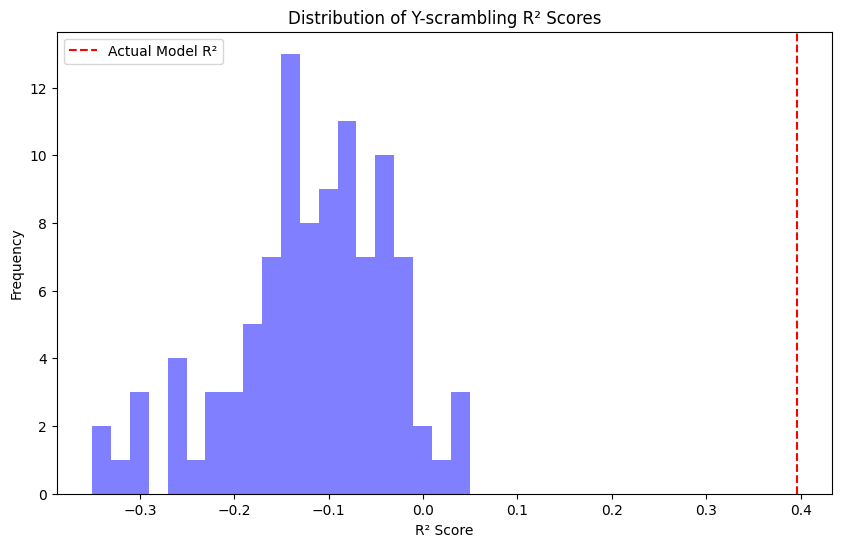

In [21]:
# Run Y-scrambling
y_scrambling(X_train_scaled, y_train)

#### Save the Model

In [23]:
import pickle

# Create a dictionary containing all necessary components
model_components = {
    'pca': pca,                      # PCA model
    'scaler': scaler,                # StandardScaler
    'model': grid_search.best_estimator_,  # Best SVR model
    'feature_names': feature_columns  # Feature names for reference
}

# Save the model components
with open('inha_qsar_model.pkl', 'wb') as f:
    pickle.dump(model_components, f)

print("Model saved successfully as 'inha_qsar_model.pkl'")

# Example of how to load and use the model (useful for Streamlit implementation)
def load_model(filename='inha_qsar_model.pkl'):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Test loading
model_components = load_model()
print("Model loaded successfully!")

Model saved successfully as 'inha_qsar_model.pkl'
Model loaded successfully!
